# Beispiel Randomisiertes vollständiges Block-Design: Vaskuläre Röhrchen

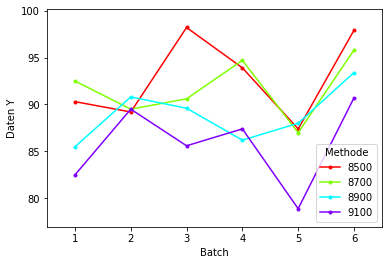

In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

Daten = DataFrame({
"Batch": np.tile(["1", "2", "3", "4", "5", "6"], 4),
"Methode": np.repeat(["8500", "8700", "8900", "9100"], 6),
"Y": np.array([90.3, 89.2, 98.2, 93.9, 87.4, 97.9, 92.5, 
89.5, 90.6, 94.7, 87, 95.8, 85.5,
 90.8, 89.6, 86.2, 88, 93.4, 82.5, 89.5, 85.6, 87.4, 
78.9, 90.7])
})

interaction_plot(x=Daten["Batch"], trace=Daten["Methode"], response=Daten["Y"])
plt.ylabel("Daten Y")
plt.show()

In [2]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.outliers_influence import summary_table
import matplotlib.pyplot as plt

from patsy.contrasts import Sum

Daten = DataFrame({
"Batch": np.tile(["1", "2", "3", "4", "5", "6"], 4),
"Methode": np.repeat(["8500", "8700", "8900", "9100"],6),
"Y": np.array([90.3, 89.2, 98.2, 93.9, 87.4, 97.9, 92.5, 89.5, 90.6, 94.7, 87, 95.8, 85.5,
 90.8, 89.6, 86.2, 88, 93.4, 82.5, 89.5, 85.6, 87.4, 78.9, 90.7])
})

fit = ols("Y ~ C(Methode, Sum)+C(Batch,Sum)", data=Daten).fit()

fit.params
print(fit.params)

Intercept                  89.795833
C(Methode, Sum)[S.8500]     3.020833
C(Methode, Sum)[S.8700]     1.887500
C(Methode, Sum)[S.8900]    -0.879167
C(Batch, Sum)[S.1]         -2.095833
C(Batch, Sum)[S.2]         -0.045833
C(Batch, Sum)[S.3]          1.204167
C(Batch, Sum)[S.4]          0.754167
C(Batch, Sum)[S.5]         -4.470833
dtype: float64


In [3]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.outliers_influence import summary_table
import matplotlib.pyplot as plt

from patsy.contrasts import Sum
import warnings
warnings.filterwarnings("ignore")
Daten = DataFrame({
"Batch": np.tile(["1", "2", "3", "4", "5", "6"], 4),
"Methode": np.repeat(["8500", "8700", "8900", "9100"],6),
"Y": np.array([90.3, 89.2, 98.2, 93.9, 87.4, 97.9, 92.5, 89.5, 90.6, 94.7, 87, 95.8, 85.5,
 90.8, 89.6, 86.2, 88, 93.4, 82.5, 89.5, 85.6, 87.4, 78.9, 90.7])
})

fit = ols("Y ~ C(Methode, Sum)+C(Batch, Sum)", data=Daten).fit()

print(anova_lm(fit))
anova_lm(fit)

                   df      sum_sq    mean_sq         F    PR(>F)
C(Methode, Sum)   3.0  178.171250  59.390417  8.107077  0.001916
C(Batch, Sum)     5.0  192.252083  38.450417  5.248666  0.005532
Residual         15.0  109.886250   7.325750       NaN       NaN


,df,sum_sq,mean_sq,F,PR(>F)
"C(Methode, Sum)",3.0,178.171250,59.390417,8.107077,0.001916
"C(Batch, Sum)",5.0,192.252083,38.450417,5.248666,0.005532
Residual,15.0,109.886250,7.325750,NaN,NaN


# Beispiel Faktorielles Experiment mit 2 Faktoren: Haftungsfestigkeit von Farben

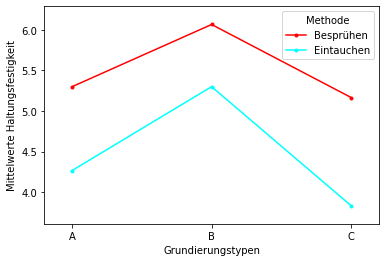

In [4]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.outliers_influence import summary_table
import matplotlib.pyplot as plt

Farbe = DataFrame({
"Grund": np.repeat(["A", "B", "C"], 6),
"Methode": np.tile(np.repeat(["Eintauchen", "Besprühen"], 3), 3),
"Y": np.array([4, 4.5, 4.3, 5.4, 4.9, 5.6, 5.6, 4.9, 5.4, 5.8, 6.1, 6.3, 3.8, 3.7, 4, 5.5, 5, 5])
})

interaction_plot(x=Farbe["Grund"], trace=Farbe["Methode"], response=Farbe["Y"])

plt.xlabel("Grundierungstypen")
plt.ylabel("Mittelwerte Haltungsfestigkeit")

plt.show()

In [5]:
fit = ols("Y~Grund*Methode",data=Farbe).fit()

anova_lm(fit)
print(anova_lm(fit))

                 df    sum_sq   mean_sq          F    PR(>F)
Grund           2.0  4.581111  2.290556  27.858108  0.000031
Methode         1.0  4.908889  4.908889  59.702703  0.000005
Grund:Methode   2.0  0.241111  0.120556   1.466216  0.269342
Residual       12.0  0.986667  0.082222        NaN       NaN


# Beispiel Faktorielles Experiment mit 2 Faktoren und (scheinbarer) Interaktion: Elritzen

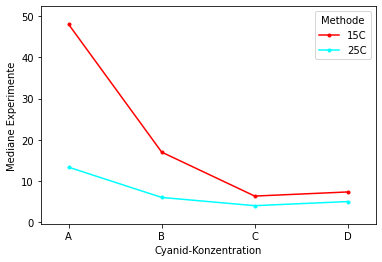

In [6]:
El = DataFrame({
"Konz": np.repeat(["A", "B", "C","D"], 6),
"Temp": np.tile(np.repeat(["15C", "25C"],3),4),
"Y": np.array([82, 46, 16, 20, 13, 7, 20, 14, 17, 6, 7, 5, 8, 6, 5, 4, 3, 5, 10, 7, 5, 6, 4, 5])
})

interaction_plot(x=El["Konz"], trace=El["Temp"], response=El["Y"],
legendtitle="Methode")

plt.xlabel("Cyanid-Konzentration")
plt.ylabel("Mediane Experimente")

plt.show()

In [7]:
fit = ols("Y~C(Konz,Sum)*C(Temp,Sum)",data=El).fit()

anova_lm(fit)
print(anova_lm(fit))

                             df       sum_sq     mean_sq         F    PR(>F)
C(Konz, Sum)                3.0  2531.125000  843.708333  5.843867  0.006803
C(Temp, Sum)                1.0   950.041667  950.041667  6.580375  0.020754
C(Konz, Sum):C(Temp, Sum)   3.0  1050.458333  350.152778  2.425301  0.103439
Residual                   16.0  2310.000000  144.375000       NaN       NaN


# Beispiel Faktorielles Experiment mit 2 Faktoren und Interaktion: Schnecken

In [8]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.outliers_influence import summary_table
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
snails = DataFrame({
"season": np.repeat(["spring", "summer"], 9),
"density": np.tile(np.repeat(["6", "12","24"],3),2),
"Y": np.array([1.17, 0.50, 1.67, 1.50, 0.83, 1.00, 0.67, 0.67, 0.75,
       4.00, 3.83, 3.83, 3.33, 2.58, 2.75, 2.54, 1.83, 1.63])
})

fit = ols("Y~season*density",data=snails).fit()

anova_lm(fit)
print(anova_lm(fit))

                  df     sum_sq    mean_sq           F        PR(>F)
season           1.0  17.130756  17.130756  119.373466  1.364839e-07
density          2.0   4.001011   2.000506   13.940266  7.422016e-04
season:density   2.0   1.689144   0.844572    5.885293  1.655191e-02
Residual        12.0   1.722067   0.143506         NaN           NaN


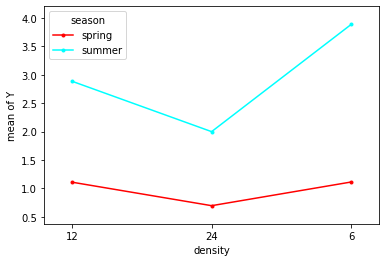

In [9]:
interaction_plot(x=snails["density"], trace=snails["season"],
response=snails["Y"])

plt.show()

In [10]:
snails_spring = snails[snails["season"]=="spring"]

fit_spring = ols("Y~density",data=snails_spring).fit()

anova_lm(fit_spring)
print(anova_lm(fit_spring))

           df    sum_sq   mean_sq         F    PR(>F)
density   2.0  0.344467  0.172233  1.103903  0.390636
Residual  6.0  0.936133  0.156022       NaN       NaN


In [11]:
snails_summer = snails[snails["season"]=="summer"]

fit_summer = ols("Y~density",data=snails_summer).fit()

anova_lm(fit_summer)
print(anova_lm(fit_summer))

           df    sum_sq   mean_sq          F    PR(>F)
density   2.0  5.345689  2.672844  20.405123  0.002106
Residual  6.0  0.785933  0.130989        NaN       NaN
